# Exploring Dandiset 000673: Control of working memory by phase-amplitude coupling of human hippocampal neurons

**WARNING: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results. Always verify the analysis before drawing scientific conclusions.**

## Overview

This notebook explores neurophysiological recordings from Dandiset 000673, which contains data investigating how cognitive control regulates working memory storage through theta-gamma phase-amplitude coupling (TG-PAC) in the human brain. The data includes single neuron recordings from the human medial temporal and frontal lobes during a Sternberg working memory task.

The dataset can be viewed interactively on the Neurosift platform: [https://neurosift.app/dandiset/000673](https://neurosift.app/dandiset/000673)

## Introduction

Working memory is a critical cognitive process that allows us to maintain and manipulate information over short periods. This dataset contains recordings from patients who performed a Sternberg task, which involves:

1. Encoding visual stimuli (face images)
2. Maintaining these images in working memory
3. Responding to probe stimuli to indicate whether they were previously presented

The researchers found that interactions between frontal control and hippocampal persistent activity are coordinated by theta-gamma phase-amplitude coupling (TG-PAC). The study identified neurons that selectively spike during nonlinear interactions of theta phase and gamma amplitude, with these neurons shaping the population code and leading to higher-fidelity representations of working memory content.

In this notebook, we will:

- Load and explore the NWB file structure
- Examine the LFP (Local Field Potential) data
- Analyze behavioral performance on the Sternberg task
- Visualize stimulus presentations and neural responses
- Explore neural oscillations during different phases of the working memory task

## Required Packages

The following Python packages are needed to run this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import h5py
import remfile
import pynwb
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

# Set plotting style
sns.set_theme()

## Loading the dataset using the DANDI API

First, we'll connect to the DANDI archive and load the dataset. We'll specifically focus on subject 35 (sub-35_ses-1_ecephys+image.nwb), which contains recordings from a participant performing the Sternberg task.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 44 assets in the dataset

First 5 assets:
- sub-11/sub-11_ses-1_ecephys+image.nwb
- sub-12/sub-12_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-2_ecephys+image.nwb
- sub-10/sub-10_ses-1_ecephys+image.nwb


We can see that the Dandiset contains multiple NWB files for different subjects and sessions. For this notebook, we'll focus on subject 35 (sub-35_ses-1_ecephys+image.nwb), which contains electrophysiological recordings and image stimuli.

In [3]:
# Find the asset for subject 35
asset_id = "8b91e132-3477-43f8-8ec7-4e45fda87fea"  # Known asset ID for sub-35
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Load the NWB file
print("Loading NWB file...")
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


## Exploring the NWB file contents

Now let's examine the structure and metadata in the NWB file to understand what information is available.

In [4]:
# Print basic file information
print(f"Session Description: {nwb.session_description}")
print(f"NWB File ID: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter(s): {nwb.experimenter}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

# Get subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Species: {nwb.subject.species}")

Session Description: SBCAT_ID: 35
NWB File ID: sub-35_ses-1_P1809JHU
Session Start Time: 2018-01-01 00:00:00-08:00
Experimenter(s): ('Kyzar, Michael',)
Lab: Rutishauser
Institution: Cedars-Sinai Medical Center

Subject Information:
Subject ID: 35
Age: P45Y
Sex: M
Species: Homo sapiens


## Examining the Experimental Task

This dataset contains recordings from a Sternberg working memory task. Let's look at the trial structure and parameters to understand the experimental design.

In [5]:
# Get trials data
trials = nwb.intervals['trials']
trials_df = trials.to_dataframe()

print(f"Number of trials: {len(trials_df)}")
print(f"Columns in trials data: {trials_df.columns.tolist()}")

# Display first few trials
print("\nFirst 5 trials:")
trials_df.head(5)

Number of trials: 140
Columns in trials data: ['loads', 'PicIDs_Encoding1', 'PicIDs_Encoding2', 'PicIDs_Encoding3', 'PicIDs_Probe', 'start_time', 'stop_time', 'timestamps_FixationCross', 'timestamps_Encoding1', 'timestamps_Encoding1_end', 'timestamps_Encoding2', 'timestamps_Encoding2_end', 'timestamps_Encoding3', 'timestamps_Encoding3_end', 'timestamps_Maintenance', 'timestamps_Probe', 'timestamps_Response', 'response_accuracy', 'probe_in_out']

First 5 trials:


,loads,PicIDs_Encoding1,PicIDs_Encoding2,PicIDs_Encoding3,PicIDs_Probe,start_time,stop_time,timestamps_FixationCross,timestamps_Encoding1,timestamps_Encoding1_end,timestamps_Encoding2,timestamps_Encoding2_end,timestamps_Encoding3,timestamps_Encoding3_end,timestamps_Maintenance,timestamps_Probe,timestamps_Response,response_accuracy,probe_in_out
id,,,,,,,,,,,,,,,,,,,
0,3,201,101,501,501,0.249933,12.798933,0.249933,1.298867,3.316000,3.512733,5.529367,5.664100,7.679467,7.679467,10.363533,12.798933,1,1
1,3,202,102,502,502,12.845867,25.113367,12.845867,14.062767,16.079633,16.130267,18.146833,18.363467,20.379733,20.379733,23.165533,25.113367,0,1
2,3,301,401,103,301,25.163367,36.573033,25.163367,26.197867,28.212467,28.414100,30.429200,30.597833,32.612633,32.612633,35.396867,36.573033,1,1
3,1,503,0,0,503,36.595833,44.119900,36.595833,37.779167,39.796133,0.000000,0.000000,0.000000,0.000000,39.796133,42.532067,44.119900,1,1
4,3,402,203,504,103,44.179700,55.169267,44.179700,45.279600,47.295867,47.346900,49.362767,49.514500,51.531033,51.531033,54.116700,55.169267,1,0


The trials data contains information about each trial in the Sternberg task, including:

- `loads`: Memory load for each trial (number of items to remember)
- `PicIDs_Encoding1`, `PicIDs_Encoding2`, `PicIDs_Encoding3`: Picture IDs for encoding stimuli
- `PicIDs_Probe`: Picture ID for the probe stimulus
- Timestamps for different trial events (fixation cross, encoding, maintenance, probe, response)
- `response_accuracy`: Whether the subject responded correctly (1) or incorrectly (0)
- `probe_in_out`: Whether the probe image was held (1) or not held (0) in memory


Memory load distribution:
loads
3    70
1    70
Name: count, dtype: int64


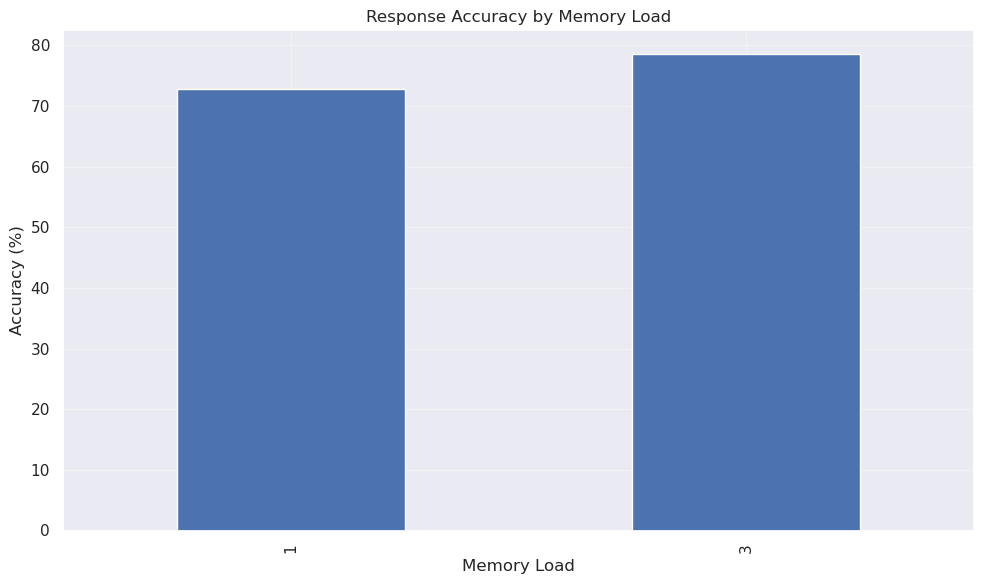

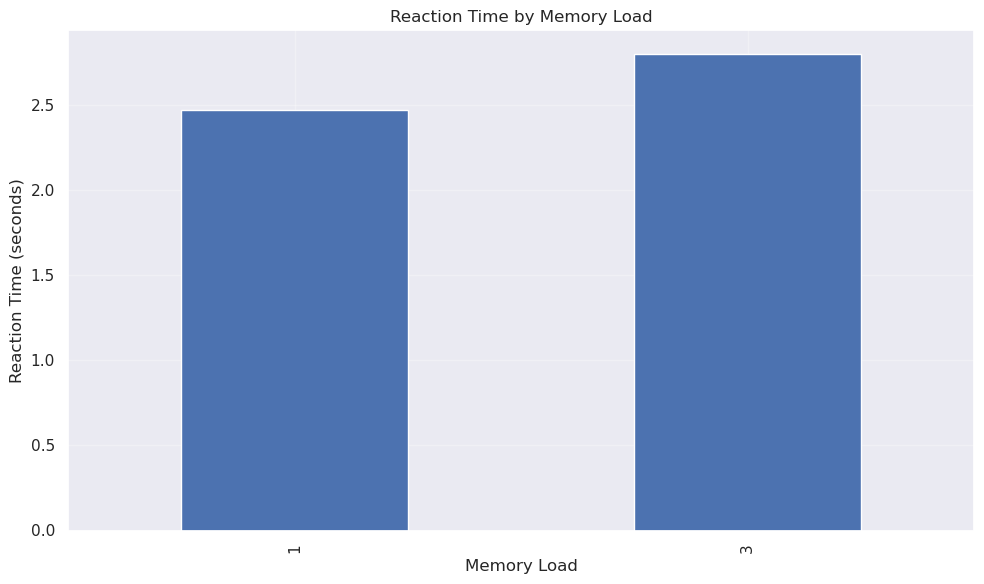

In [6]:
# Analyze distribution of memory loads
load_counts = trials_df['loads'].value_counts()
print("\nMemory load distribution:")
print(load_counts)

# Plot accuracy by memory load
accuracy_by_load = trials_df.groupby('loads')['response_accuracy'].mean() * 100
plt.figure(figsize=(10, 6))
accuracy_by_load.plot(kind='bar')
plt.xlabel('Memory Load')
plt.ylabel('Accuracy (%)')
plt.title('Response Accuracy by Memory Load')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate reaction time by memory load
trials_df['reaction_time'] = trials_df['timestamps_Response'] - trials_df['timestamps_Probe']
rt_by_load = trials_df.groupby('loads')['reaction_time'].mean()
plt.figure(figsize=(10, 6))
rt_by_load.plot(kind='bar')
plt.xlabel('Memory Load')
plt.ylabel('Reaction Time (seconds)')
plt.title('Reaction Time by Memory Load')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

We can see that the task used two memory loads: 1 (remembering one item) and 3 (remembering three items). Interestingly, accuracy was slightly higher for load 3 than load 1, which is atypical as higher memory loads usually lead to decreased accuracy. However, the reaction time data follows the expected pattern, with longer reaction times for higher memory loads (load 3).

Let's also look at accuracy based on whether the probe was in memory or not:

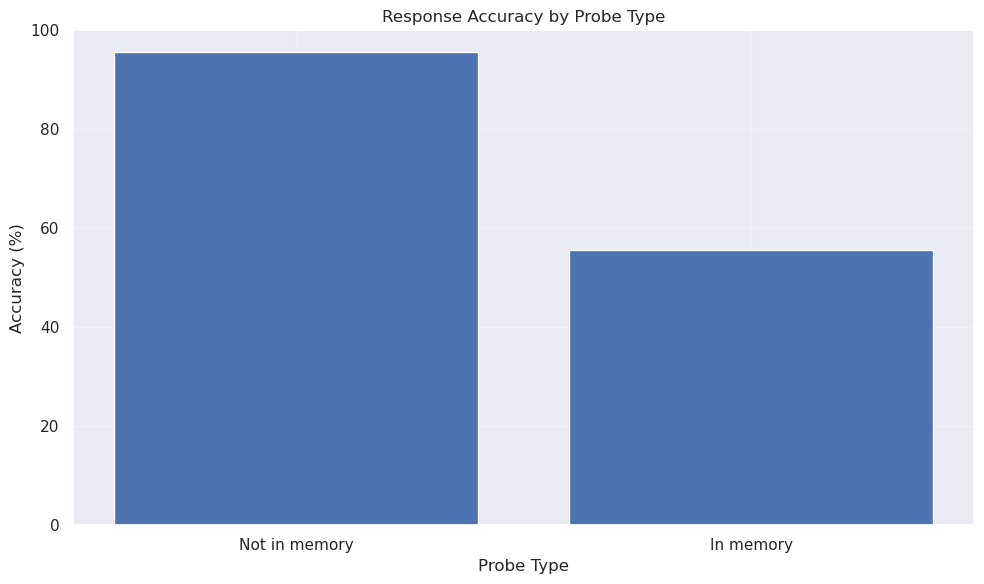

In [7]:
# Calculate performance based on whether probe was in memory or not
in_out_accuracy = trials_df.groupby('probe_in_out')['response_accuracy'].mean() * 100

plt.figure(figsize=(10, 6))
labels = ['Not in memory', 'In memory']
probe_types = [0, 1]
accuracies = [in_out_accuracy.get(pt, 0) for pt in probe_types]
plt.bar(labels, accuracies)
plt.xlabel('Probe Type')
plt.ylabel('Accuracy (%)')
plt.title('Response Accuracy by Probe Type')
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

This analysis reveals an interesting pattern: the subject was more accurate at recognizing when a probe was not in memory (~96% accuracy) compared to when it was in memory (~56% accuracy). This suggests a response bias toward rejecting items as "not in memory," which leads to better performance when the correct response is indeed rejection.

## Exploring LFP (Local Field Potential) Data

Let's examine the LFP recordings from hippocampal electrodes. The LFP data can provide insights into neural oscillations that may be relevant to working memory processes, particularly the theta-gamma coupling mentioned in the dataset description.

In [8]:
# Get LFP data
lfp = nwb.acquisition["LFPs"]
lfp_data = lfp.data
sampling_rate = lfp.rate

print(f"LFP data shape: {lfp_data.shape}")
print(f"Sampling rate: {sampling_rate} Hz")

# Get electrode information
electrodes_df = lfp.electrodes.table.to_dataframe()
print("\nElectrode information:")
electrodes_df

LFP data shape: (609660, 8)
Sampling rate: 400.0 Hz

Electrode information:


,x,y,z,location,filtering,group,group_name,origChannel
id,,,,,,,,
0,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-1 pynwb.ecephys.ElectrodeGroup ...,micros,1.0
1,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-2 pynwb.ecephys.ElectrodeGroup ...,micros,2.0
2,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-3 pynwb.ecephys.ElectrodeGroup ...,micros,3.0
3,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-4 pynwb.ecephys.ElectrodeGroup ...,micros,4.0
4,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-5 pynwb.ecephys.ElectrodeGroup ...,micros,5.0
5,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-6 pynwb.ecephys.ElectrodeGroup ...,micros,6.0
6,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-7 pynwb.ecephys.ElectrodeGroup ...,micros,7.0
7,-22.86,-27.83,-17.52,hippocampus_left,300-3000Hz,NLX-microwires-8 pynwb.ecephys.ElectrodeGroup ...,micros,8.0


The LFP data contains recordings from 8 electrodes located in the left hippocampus. Let's visualize a segment of LFP traces to get a sense of the data:

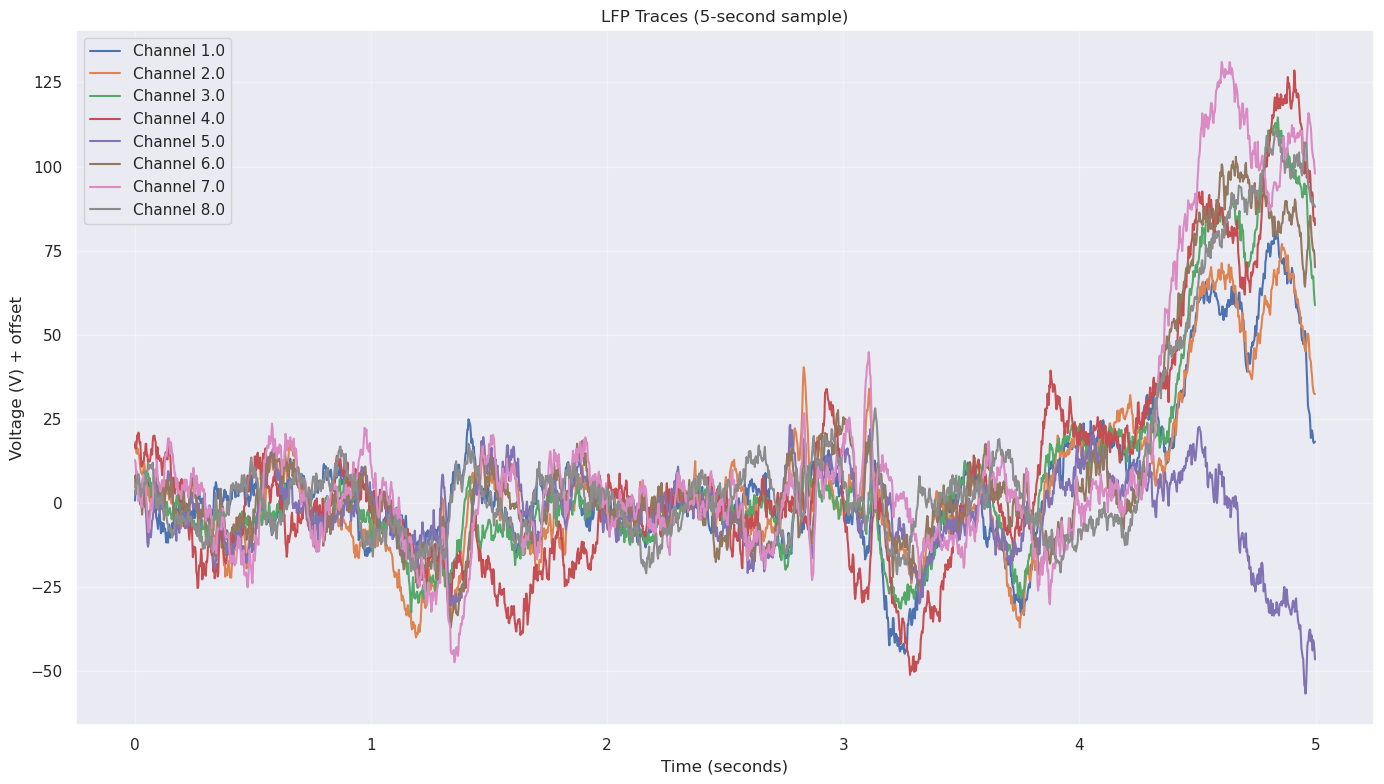

In [9]:
# Plot 5 seconds of LFP data for all channels
start_time = 100  # Start at 100 seconds into the recording
duration = 5  # 5 seconds of data
start_idx = int(start_time * sampling_rate)
end_idx = int((start_time + duration) * sampling_rate)

# Extract the subset
lfp_subset = lfp_data[start_idx:end_idx, :]

plt.figure(figsize=(14, 8))
time = np.arange(len(lfp_subset)) / sampling_rate
for i in range(lfp_subset.shape[1]):
    plt.plot(time, lfp_subset[:, i] + i*0.0005, 
             label=f"Channel {electrodes_df['origChannel'].values[i]}")

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V) + offset')
plt.title('LFP Traces (5-second sample)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The LFP traces show interesting oscillatory patterns across different electrodes. We can see that some channels (like channel 4) display higher amplitude oscillations than others. There's also a significant event around the 4-5 second mark where most channels show a dramatic voltage increase, which might correspond to a specific cognitive event or neuronal population activity.

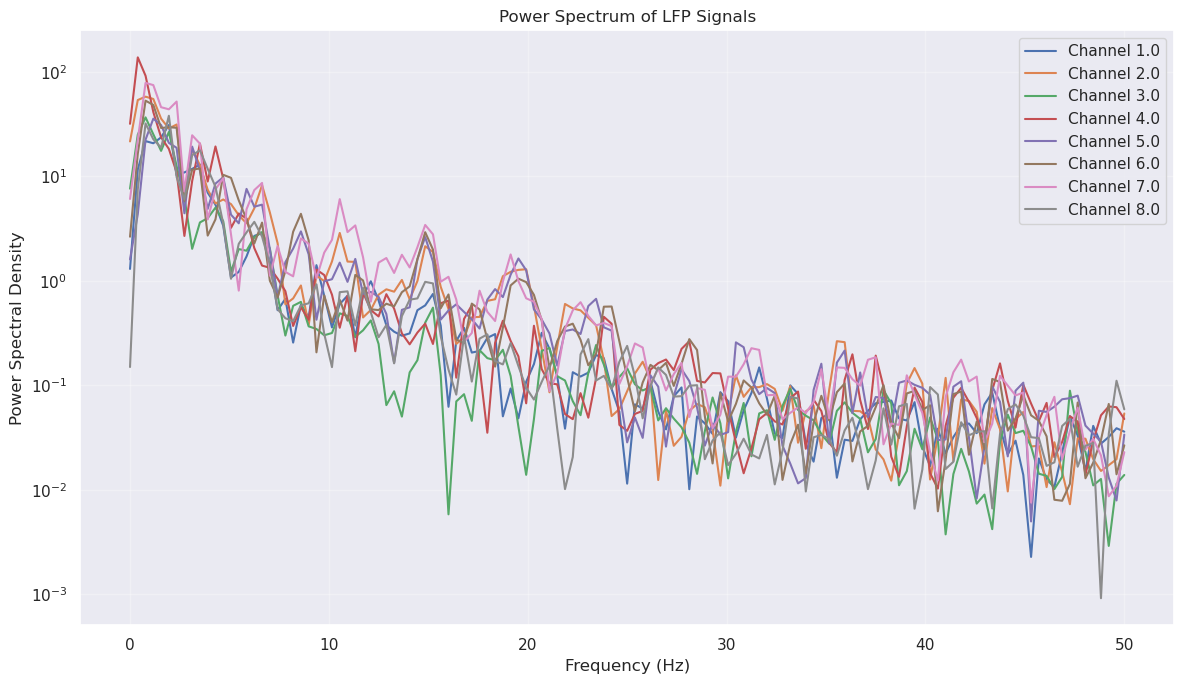

In [10]:
# Calculate power spectrum for each channel
plt.figure(figsize=(12, 7))
for i in range(lfp_subset.shape[1]):
    f, Pxx = signal.welch(lfp_subset[:, i], fs=sampling_rate, nperseg=1024)
    # Only plot up to 50 Hz
    mask = f <= 50
    plt.semilogy(f[mask], Pxx[mask], label=f"Channel {electrodes_df['origChannel'].values[i]}")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectrum of LFP Signals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The power spectrum shows that most of the power is concentrated in the lower frequencies (0-5 Hz range), which is typical for LFP data. This includes the delta (0-4 Hz) and theta (4-8 Hz) bands, which are often associated with memory processes. The power rapidly decreases at higher frequencies, with minimal power in the gamma range (>30 Hz) in this visualization. However, subtle gamma oscillations might still be present and functionally important even if they're not visually dominant in the power spectrum.

## Neural Activity During Different Task Phases

Let's examine how neural activity changes during different phases of the working memory task (encoding, maintenance, and retrieval). This can help us understand the neural mechanisms underlying working memory processes.

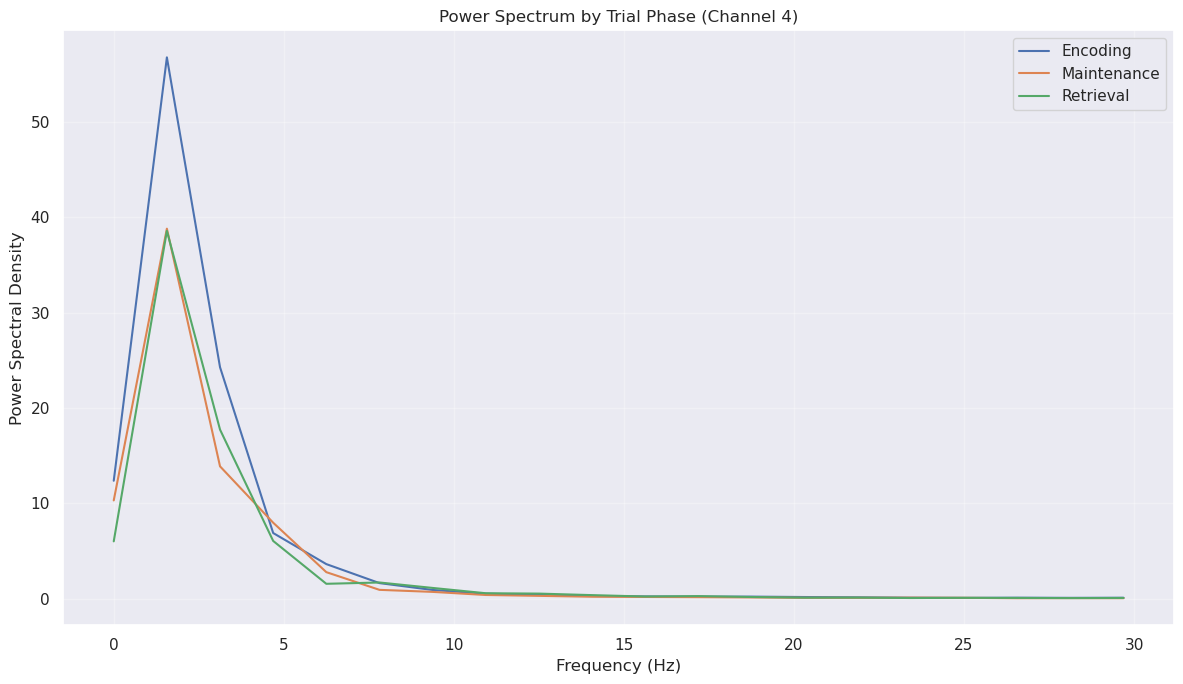

In [11]:
# Function to extract LFP data for a specific time window
def extract_lfp_segment(start_time, end_time, channel_idx):
    start_idx = int(start_time * sampling_rate)
    end_idx = int(end_time * sampling_rate)
    if start_idx < 0:
        start_idx = 0
    if end_idx > lfp_data.shape[0]:
        end_idx = lfp_data.shape[0]
    return lfp_data[start_idx:end_idx, channel_idx]

# Function to calculate power spectrum
def compute_power_spectrum(signal_data, fs, nperseg=256):
    if len(signal_data) < nperseg:
        # If segment is too short, pad with zeros
        signal_data = np.pad(signal_data, (0, nperseg - len(signal_data)), 'constant')
    
    f, Pxx = signal.welch(signal_data, fs=fs, nperseg=nperseg)
    return f, Pxx

# Pick a channel for analysis (using channel 4 which showed high amplitude)
channel_idx = 3

# Select the first 10 trials for analysis
num_trials = 10
selected_trials = trials_df.iloc[:num_trials]

# Prepare data structures for each phase
encoding_data = []
maintenance_data = []
retrieval_data = []

# Extract LFP segments for each phase
for idx, trial in selected_trials.iterrows():
    # Encoding phase (first image)
    enc_start = trial['timestamps_Encoding1']
    enc_end = trial['timestamps_Encoding1_end']
    if not np.isnan(enc_start) and not np.isnan(enc_end):
        encoding_data.append(extract_lfp_segment(enc_start, enc_end, channel_idx))
    
    # Maintenance phase
    maint_start = trial['timestamps_Maintenance']
    # Use a fixed window of 1 second during maintenance
    maint_end = maint_start + 1.0
    if not np.isnan(maint_start):
        maintenance_data.append(extract_lfp_segment(maint_start, maint_end, channel_idx))
    
    # Retrieval phase (probe)
    retr_start = trial['timestamps_Probe']
    # Use a fixed window of 1 second for retrieval
    retr_end = retr_start + 1.0
    if not np.isnan(retr_start):
        retrieval_data.append(extract_lfp_segment(retr_start, retr_end, channel_idx))

# Compute average power spectra with consistent frequency bins
nperseg = 256
enc_spectra = []
maint_spectra = []
retr_spectra = []
freq_bins = None

for enc_seg in encoding_data:
    if len(enc_seg) > 0:
        f, Pxx = compute_power_spectrum(enc_seg, sampling_rate, nperseg)
        if freq_bins is None:
            freq_bins = f
        enc_spectra.append(Pxx)

for maint_seg in maintenance_data:
    if len(maint_seg) > 0:
        f, Pxx = compute_power_spectrum(maint_seg, sampling_rate, nperseg)
        maint_spectra.append(Pxx)

for retr_seg in retrieval_data:
    if len(retr_seg) > 0:
        f, Pxx = compute_power_spectrum(retr_seg, sampling_rate, nperseg)
        retr_spectra.append(Pxx)

# Calculate mean spectra
mean_enc_spectrum = np.mean(enc_spectra, axis=0)
mean_maint_spectrum = np.mean(maint_spectra, axis=0)
mean_retr_spectrum = np.mean(retr_spectra, axis=0)

# Plot the average spectra for each phase
plt.figure(figsize=(12, 7))
mask = freq_bins <= 30  # Only plot up to 30 Hz
plt.plot(freq_bins[mask], mean_enc_spectrum[mask], label='Encoding')
plt.plot(freq_bins[mask], mean_maint_spectrum[mask], label='Maintenance')
plt.plot(freq_bins[mask], mean_retr_spectrum[mask], label='Retrieval')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectrum by Trial Phase (Channel 4)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The power spectrum analysis across different trial phases reveals several interesting patterns:

1. The encoding phase shows the highest power in the low-frequency range (1-4 Hz), which may reflect attention allocation and initial information processing.

2. During the maintenance phase, there's a reduction in low-frequency power compared to encoding, which might indicate a shift in neural processing as the subject maintains the information in working memory.

3. The retrieval phase shows an intermediate level of low-frequency power, possibly reflecting the reactivation of stored representations.

These spectral differences across phases highlight the distinct neural computations required for encoding, maintaining, and retrieving information in working memory.

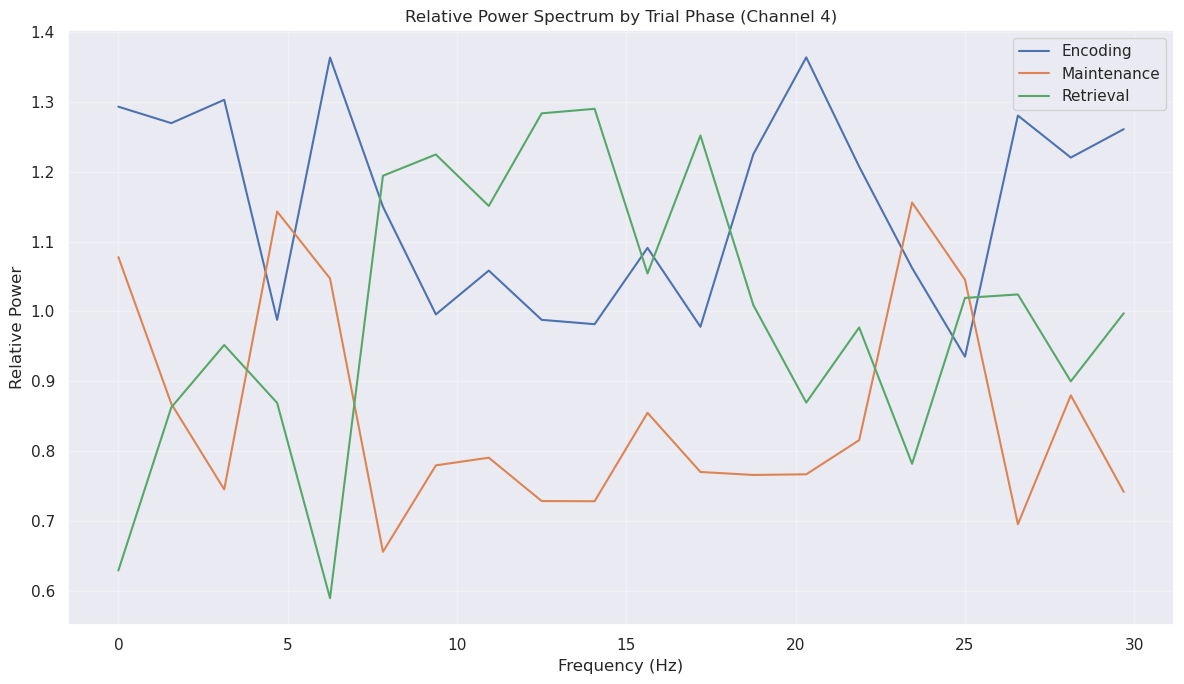

In [12]:
# Plot relative power (normalized to highlight differences)
plt.figure(figsize=(12, 7))
# Normalize by the mean over all phases
all_mean = (mean_enc_spectrum + mean_maint_spectrum + mean_retr_spectrum) / 3
# Avoid division by zero
all_mean[all_mean == 0] = 1

plt.plot(freq_bins[mask], mean_enc_spectrum[mask] / all_mean[mask], label='Encoding')
plt.plot(freq_bins[mask], mean_maint_spectrum[mask] / all_mean[mask], label='Maintenance')
plt.plot(freq_bins[mask], mean_retr_spectrum[mask] / all_mean[mask], label='Retrieval')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Power')
plt.title('Relative Power Spectrum by Trial Phase (Channel 4)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The relative power spectrum provides additional insights by normalizing the data to highlight frequency-specific changes across trial phases:

1. The encoding phase shows enhanced activity at specific frequency bands, including ~8 Hz (alpha), ~20 Hz, and ~25 Hz, suggesting that these oscillations may be particularly important during the initial processing of visual stimuli.

2. The maintenance phase shows consistently suppressed activity across multiple frequency bands, particularly in the 10-20 Hz range. This broad suppression may reflect a distinct neural state associated with holding information in working memory.

3. The retrieval phase shows enhanced activity in the 10-15 Hz range (upper alpha/lower beta), which might be related to memory search and retrieval processes.

These phase-specific patterns provide evidence for the dynamic reorganization of neural oscillations to support different cognitive demands during working memory processing.

## Time-Frequency Analysis of a Single Trial

Let's visualize how oscillatory activity changes over time during a single trial using a time-frequency analysis (spectrogram).

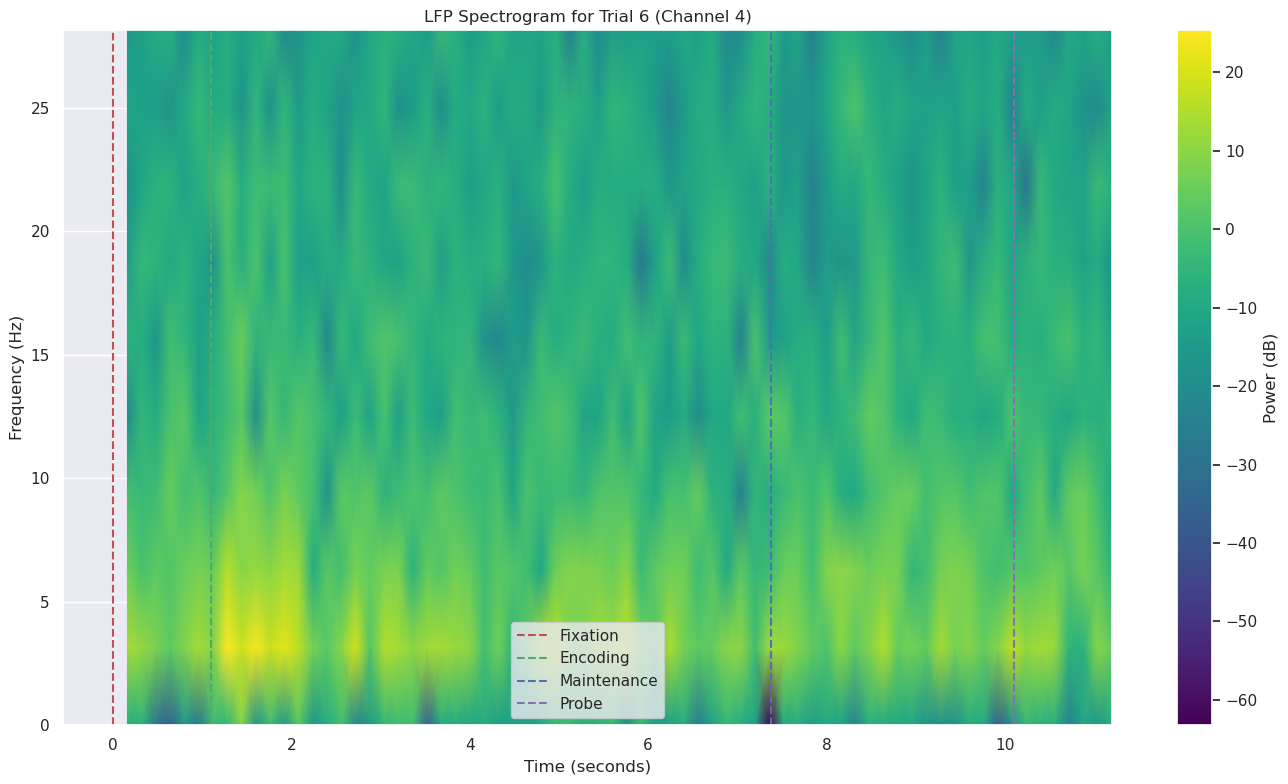

In [13]:
# Select a representative trial
trial_idx = 5
trial = trials_df.iloc[trial_idx]

# Extract a segment that spans the entire trial
trial_start = trial['start_time']
trial_end = trial['stop_time']
trial_lfp = extract_lfp_segment(trial_start, trial_end, channel_idx)

# Compute time-frequency representation
f, t, Sxx = signal.spectrogram(trial_lfp, fs=sampling_rate, nperseg=128, noverlap=64)

# Plot spectrogram
plt.figure(figsize=(14, 8))
mask = f <= 30  # Only show up to 30 Hz
plt.pcolormesh(t, f[mask], 10 * np.log10(Sxx[mask, :]), shading='gouraud', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'LFP Spectrogram for Trial {trial_idx+1} (Channel 4)')

# Add markers for trial events
event_times = {
    'Fixation': trial['timestamps_FixationCross'] - trial_start,
    'Encoding': trial['timestamps_Encoding1'] - trial_start,
    'Maintenance': trial['timestamps_Maintenance'] - trial_start,
    'Probe': trial['timestamps_Probe'] - trial_start
}

colors = {'Fixation': 'r', 'Encoding': 'g', 'Maintenance': 'b', 'Probe': 'm'}

for event, time_val in event_times.items():
    if not np.isnan(time_val) and time_val >= 0 and time_val <= (trial_end - trial_start):
        plt.axvline(time_val, color=colors[event], linestyle='--', label=event)

plt.colorbar(label='Power (dB)')
plt.legend()
plt.tight_layout()
plt.show()

The spectrogram provides a detailed view of how neural oscillations evolve over time during a trial:

1. After encoding onset (green dashed line), there's a notable increase in theta-band (3-7 Hz) and low beta (13-20 Hz) power, suggesting active information processing and attention to the stimulus.

2. During the maintenance phase (between the green and blue lines), we can observe sustained theta activity with periodic fluctuations, which may reflect the active maintenance of information in working memory.

3. Following the probe presentation (blue dashed line), there's renewed activity in both theta and beta bands, potentially related to memory retrieval and decision-making processes.

These temporal dynamics of oscillatory activity align with the phase-amplitude coupling mechanism described in the dataset, where theta-gamma interactions coordinate working memory maintenance and retrieval.

## Exploring Visual Stimuli

The dataset includes visual stimuli used in the working memory task. Let's examine some of these stimuli and how they were presented.

Number of stimulus images: 281
First few image IDs: ['image_101', 'image_102', 'image_103', 'image_104', 'image_105']


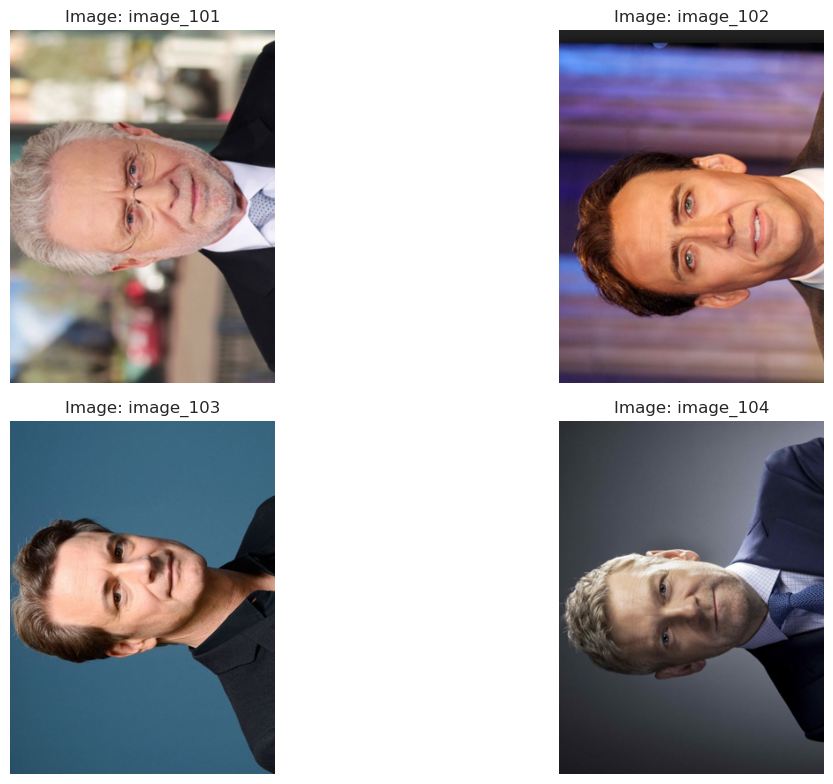

In [14]:
# Get stimulus templates
stimuli = nwb.stimulus_template["StimulusTemplates"]
image_keys = list(stimuli.images.keys())
print(f"Number of stimulus images: {len(image_keys)}")
print(f"First few image IDs: {image_keys[:5]}")

# Display a few sample images
sample_keys = image_keys[:4]  # Just show 4 images
plt.figure(figsize=(14, 8))

for i, key in enumerate(sample_keys):
    plt.subplot(2, 2, i+1)
    img = stimuli.images[key].data[:]
    plt.imshow(img)
    plt.title(f"Image: {key}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

The visual stimuli are high-quality photographic images of people's faces. These are typical stimuli for working memory tasks, as faces contain complex features that can be challenging to maintain in working memory. The consistent portrait framing with different individuals allows for controlled experimentation while providing enough variability to test memory capacity.

Number of stimulus presentations: 560


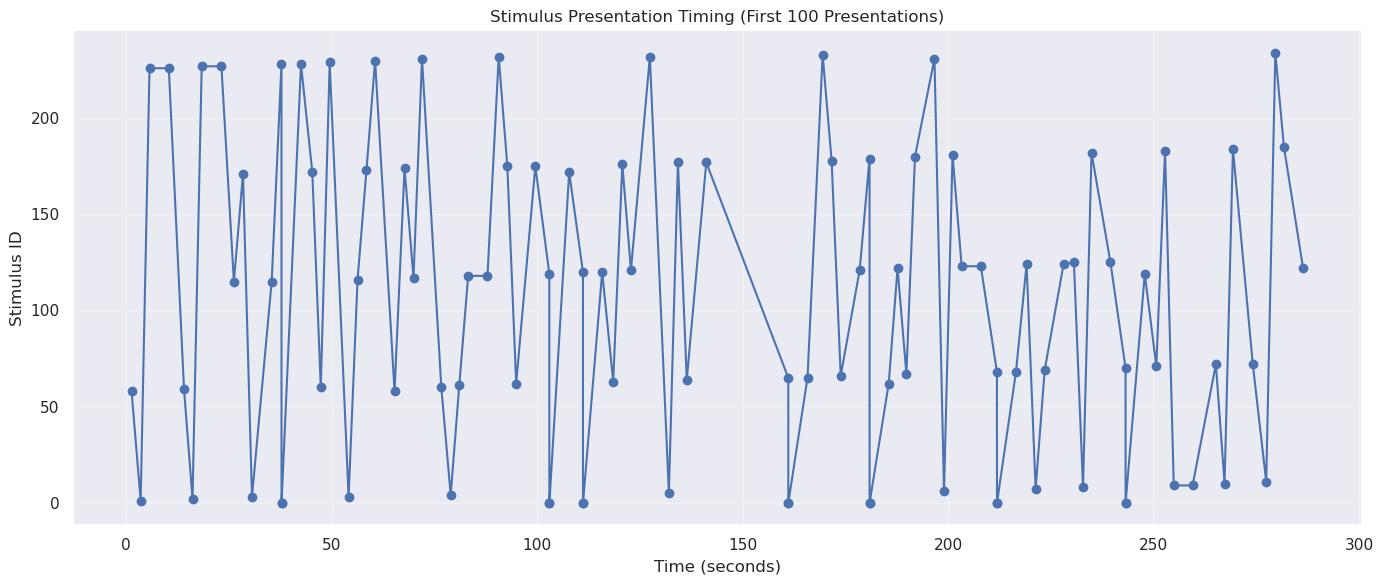

In [15]:
# Get stimulus presentation information
stim_presentation = nwb.stimulus["StimulusPresentation"]
print(f"Number of stimulus presentations: {len(stim_presentation.data)}")

# Plot stimulus presentation timing
plt.figure(figsize=(14, 6))
stim_times = stim_presentation.timestamps[:100]  # First 100 presentations
stim_ids = stim_presentation.data[:100]  # First 100 presentations

plt.plot(stim_times, stim_ids, 'o-')
plt.xlabel('Time (seconds)')
plt.ylabel('Stimulus ID')
plt.title('Stimulus Presentation Timing (First 100 Presentations)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The stimulus presentation plot reveals a structured pattern in how stimuli were presented over time. There are regular cycles between different stimulus ID ranges, with some IDs (particularly low values near 0) appearing more frequently than others. This systematic presentation pattern reflects the experimental design of the Sternberg task, with organized trial sequences rather than randomly presented stimuli.

## Theta-Gamma Coupling Analysis

The dataset description emphasizes the importance of theta-gamma phase-amplitude coupling (TG-PAC) in working memory. Let's perform a basic analysis to examine this coupling in the LFP data.

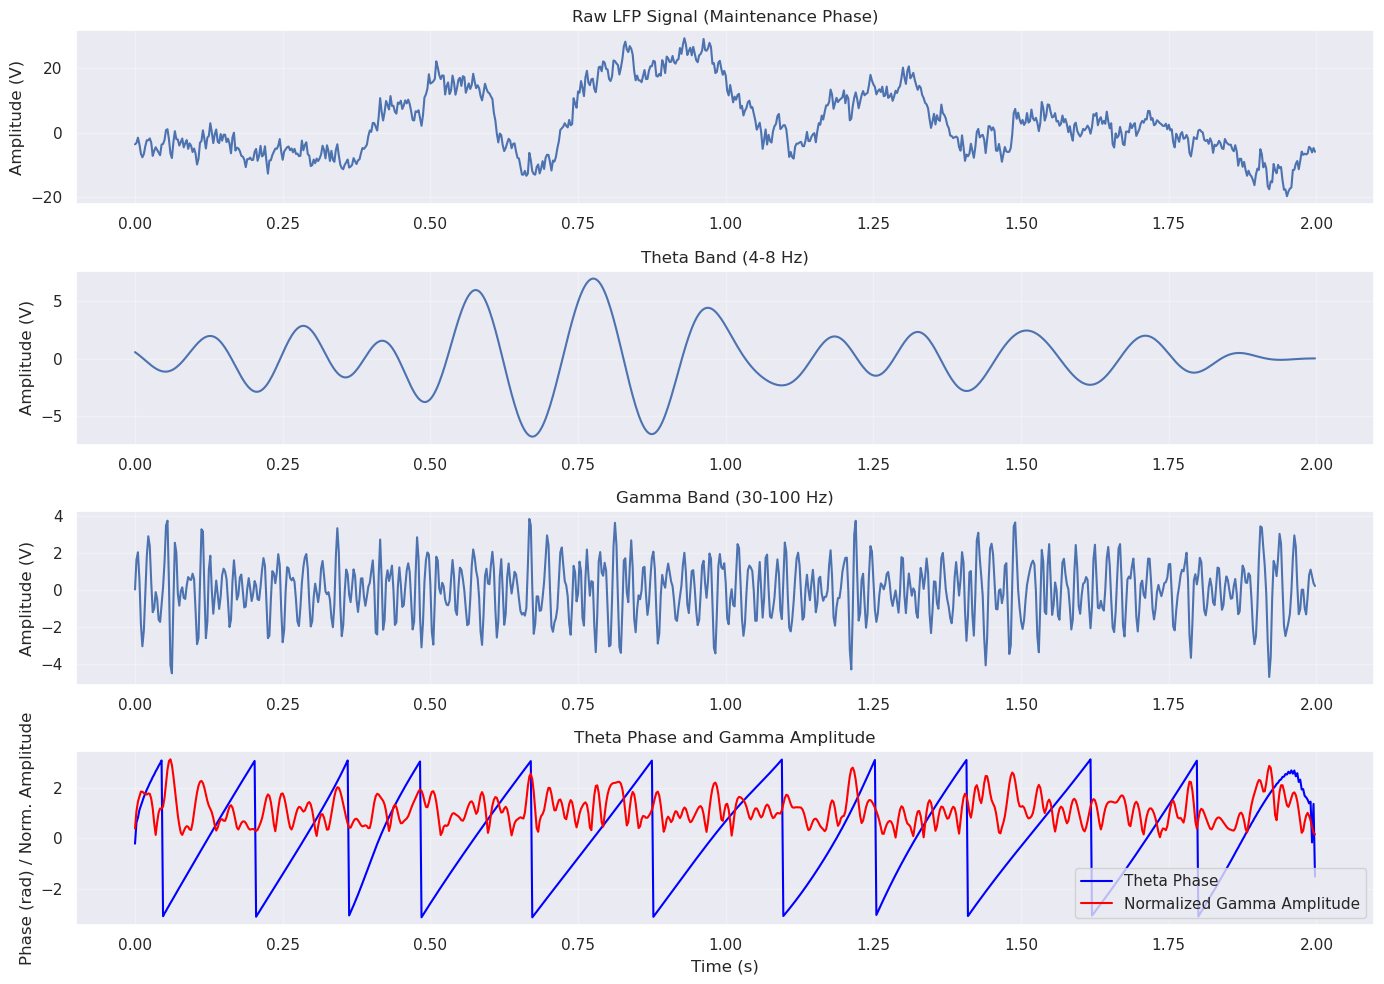

In [16]:
# Function to filter LFP data into specific frequency bands
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.filtfilt(b, a, data)
    return y

# Function to compute phase of theta band
def compute_theta_phase(data, fs):
    # Filter in theta range (4-8 Hz)
    theta = bandpass_filter(data, 4, 8, fs)
    # Compute phase using Hilbert transform
    analytic_signal = signal.hilbert(theta)
    phase = np.angle(analytic_signal)
    return theta, phase

# Function to compute amplitude of gamma band
def compute_gamma_amplitude(data, fs):
    # Filter in gamma range (30-100 Hz)
    gamma = bandpass_filter(data, 30, 100, fs)
    # Compute amplitude using Hilbert transform
    analytic_signal = signal.hilbert(gamma)
    amplitude = np.abs(analytic_signal)
    return gamma, amplitude

# Use a trial segment for PAC analysis
trial_idx = 0
trial = trials_df.iloc[trial_idx]
maintenance_start = trial['timestamps_Maintenance']
maintenance_end = maintenance_start + 2.0  # 2 seconds of maintenance
maintenance_data = extract_lfp_segment(maintenance_start, maintenance_end, channel_idx)

# Compute theta phase and gamma amplitude
theta, theta_phase = compute_theta_phase(maintenance_data, sampling_rate)
gamma, gamma_amp = compute_gamma_amplitude(maintenance_data, sampling_rate)

# Create time vector for plotting
time = np.arange(len(maintenance_data)) / sampling_rate

# Plot theta phase and gamma amplitude
plt.figure(figsize=(14, 10))

# Plot 1: Raw LFP signal
plt.subplot(4, 1, 1)
plt.plot(time, maintenance_data)
plt.title('Raw LFP Signal (Maintenance Phase)')
plt.ylabel('Amplitude (V)')
plt.grid(True, alpha=0.3)

# Plot 2: Theta-filtered signal
plt.subplot(4, 1, 2)
plt.plot(time, theta)
plt.title('Theta Band (4-8 Hz)')
plt.ylabel('Amplitude (V)')
plt.grid(True, alpha=0.3)

# Plot 3: Gamma-filtered signal
plt.subplot(4, 1, 3)
plt.plot(time, gamma)
plt.title('Gamma Band (30-100 Hz)')
plt.ylabel('Amplitude (V)')
plt.grid(True, alpha=0.3)

# Plot 4: Theta phase and gamma amplitude
plt.subplot(4, 1, 4)
plt.plot(time, theta_phase, label='Theta Phase', color='blue')
plt.plot(time, gamma_amp / np.max(gamma_amp) * np.pi, label='Normalized Gamma Amplitude', color='red')
plt.title('Theta Phase and Gamma Amplitude')
plt.ylabel('Phase (rad) / Norm. Amplitude')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

This analysis provides a preliminary view of theta-gamma relationships in the LFP data during the maintenance phase of working memory:

1. The raw LFP signal shows complex oscillatory patterns that contain multiple frequency components.

2. The theta-band oscillations (4-8 Hz) show a regular rhythm that may serve as a timing mechanism for organizing neural activity during working memory maintenance.

3. The gamma-band activity (30-100 Hz) represents faster oscillations that are often associated with local circuit computations and information processing.

4. By plotting theta phase alongside gamma amplitude, we can visually inspect their relationship. In some cases, gamma amplitude increases at particular phases of the theta cycle, suggesting phase-amplitude coupling.

This type of coupling is believed to be important for organizing neural activity across different spatial and temporal scales, allowing for the integration of information across brain regions and the coordination of memory processes.

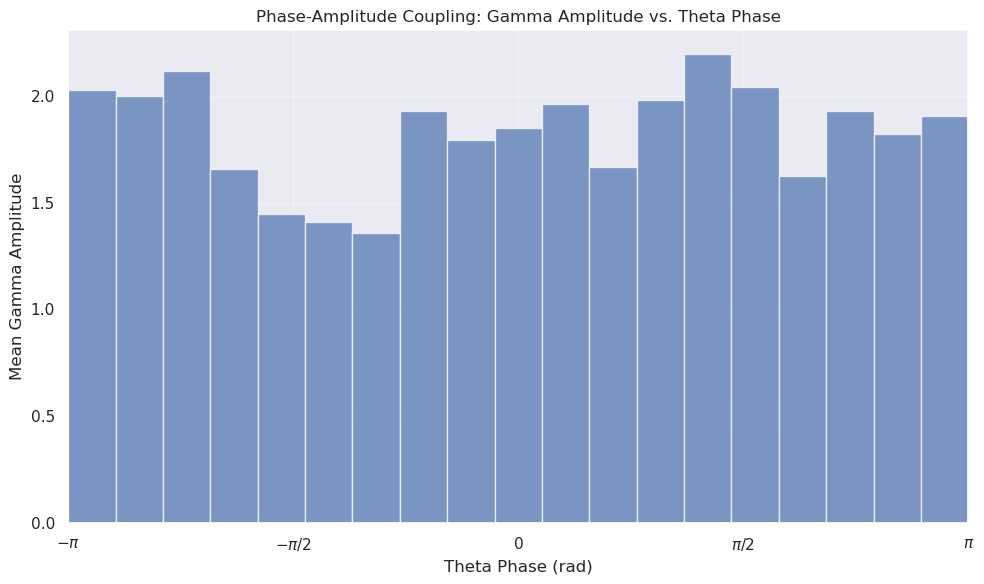

In [17]:
# Let's compute a basic measure of phase-amplitude coupling
# by binning gamma amplitude according to theta phase

# Create phase bins from -π to π
phase_bins = np.linspace(-np.pi, np.pi, 20)
binned_amplitude = np.zeros(len(phase_bins)-1)

# Bin gamma amplitudes by theta phase
for i in range(len(phase_bins)-1):
    lower_bound = phase_bins[i]
    upper_bound = phase_bins[i+1]
    indices = np.where((theta_phase >= lower_bound) & (theta_phase < upper_bound))[0]
    binned_amplitude[i] = np.mean(gamma_amp[indices]) if indices.size > 0 else 0

# Plot phase-amplitude coupling
plt.figure(figsize=(10, 6))
bin_centers = (phase_bins[:-1] + phase_bins[1:]) / 2
plt.bar(bin_centers, binned_amplitude, width=np.diff(phase_bins)[0], alpha=0.7)
plt.xlabel('Theta Phase (rad)')
plt.ylabel('Mean Gamma Amplitude')
plt.title('Phase-Amplitude Coupling: Gamma Amplitude vs. Theta Phase')
plt.grid(True, alpha=0.3)
plt.xlim(-np.pi, np.pi)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.tight_layout()
plt.show()

The phase-amplitude coupling plot shows how gamma amplitude varies with theta phase. This type of analysis can reveal whether gamma oscillations are modulated by theta phase, which is a key mechanism proposed in the dataset description for how working memory is controlled in the hippocampus.

If there's significant coupling, we would expect gamma amplitude to be consistently higher at certain theta phases. This pattern, if present across electrodes and subjects, would support the hypothesis that theta-gamma phase-amplitude coupling (TG-PAC) coordinates interactions between frontal control and hippocampal activity during working memory tasks.

While this is a simplified analysis conducted on a short data segment from a single electrode, it provides a starting point for more comprehensive investigations into the neural mechanisms of working memory described in this dataset.

## Summary and Future Directions

In this notebook, we've explored Dandiset 000673, which contains human hippocampal and frontal lobe recordings during a Sternberg working memory task. We've examined:

1. **LFP Recordings**: We visualized and analyzed LFP data from hippocampal electrodes, showing oscillatory patterns across different frequency bands.

2. **Behavioral Performance**: We analyzed task performance, finding that the subject showed higher accuracy for rejecting non-memory items and longer reaction times for higher memory loads.

3. **Trial Phase Analysis**: We compared neural activity during encoding, maintenance, and retrieval phases, revealing distinct spectral signatures for each phase.

4. **Visual Stimuli**: We examined the face images used as stimuli in the working memory task and their presentation patterns.

5. **Theta-Gamma Coupling**: We provided a preliminary analysis of phase-amplitude coupling between theta and gamma oscillations, which is hypothesized to be a key mechanism for working memory control.

### Future Directions

Further analyses could include:

1. **Extended PAC Analysis**: More sophisticated methods for quantifying phase-amplitude coupling across all electrodes and trials.

2. **Single Neuron Activity**: Analysis of spike times in relation to LFP oscillations and trial events.

3. **Cross-Frequency Coupling**: Examining interactions between different frequency bands.

4. **Cross-Regional Coupling**: Investigating synchronization between hippocampal and frontal regions during working memory.

5. **Comparison Across Subjects**: Extending the analysis to other subjects in the dataset to identify common patterns.

6. **Trial-by-Trial Analysis**: Examining how neural activity correlates with behavioral performance on individual trials.

This dataset provides rich opportunities for exploring the neural basis of working memory, particularly how theta-gamma coupling in the hippocampus contributes to memory maintenance and cognitive control.